<font size="4">In this notebook we present some examples utilizing the compact cluster and association catalogs. The notebook is mainly aimed to display how to bring the PHANGS-HST compact cluster pipeline data products to work in a python medium.</font>

In [9]:
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
import pandas as pd
import numpy as np
from astropy.table import Table

<font size="4">First, we will set the stage by making the following definitons;</font>

In [10]:
"""The code currently assumes that the catalogs needed are in the same directory as the code itself"""
cwd = os.getcwd()
"""We also define a data release label to be used throughout the code"""
ir_label = 'PHANGS_IR3'
"""We read the v1p6 PHANGS galaxy properties table to access quantities such as the SFR"""
phangs_props_df = pd.read_csv(cwd+'/phangs_sample_table_v1p6_SD_modified.csv')
"""We provide the list of galaxies released in PHANGS IR3 below"""
phangs_ir3_list = ['ngc628c', 'ngc628e', 'ngc685', 'ngc1087', 'ngc1365', 'ngc1385',
                   'ngc1433', 'ngc1512', 'ngc1559', 'ngc1566', 'ngc1672', 'ngc1792',
                   'ngc2775', 'ngc2835', 'ngc3351', 'ngc3627', 'ngc4298', 'ngc4303',
                   'ngc4321', 'ngc4535', 'ngc4548', 'ngc4569', 'ngc4571', 'ngc4654',
                   'ngc4689', 'ngc4826', 'ngc5068', 'ngc5248', 'ic5332', 'ngc7496']
# SD Comment: ngc6744 is excluded for now

"""Next, set the list of galaxies you wish to analyze. For now, we'll set that to be equal to the IR3 list"""
analyze_list = phangs_ir3_list
"""
Next, we make a figure demonstrating the number of objects per morphological type in human/machine classified catalogs.
We set a classification label to access the class12 compact cluster catalogs, and class 3 compact association catalogs.
"""
class_label_list = ['class12', 'class3']

<font size="4">Next, we will demonstrate how to read the various data products, and make a demographic information figure.</font>

/home/sinandeger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: `item` has been deprecated and will be removed in a future version
/home/sinandeger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: `item` has been deprecated and will be removed in a future version
/home/sinandeger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: `item` has been deprecated and will be removed in a future version
  app.launch_new_instance()
/home/sinandeger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: `item` has been deprecated and will be removed in a future version
/home/sinandeger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: `item` has been deprecated and will be removed in a future version
/home/sinandeger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: `item` has been deprecated and will be removed in a future ve

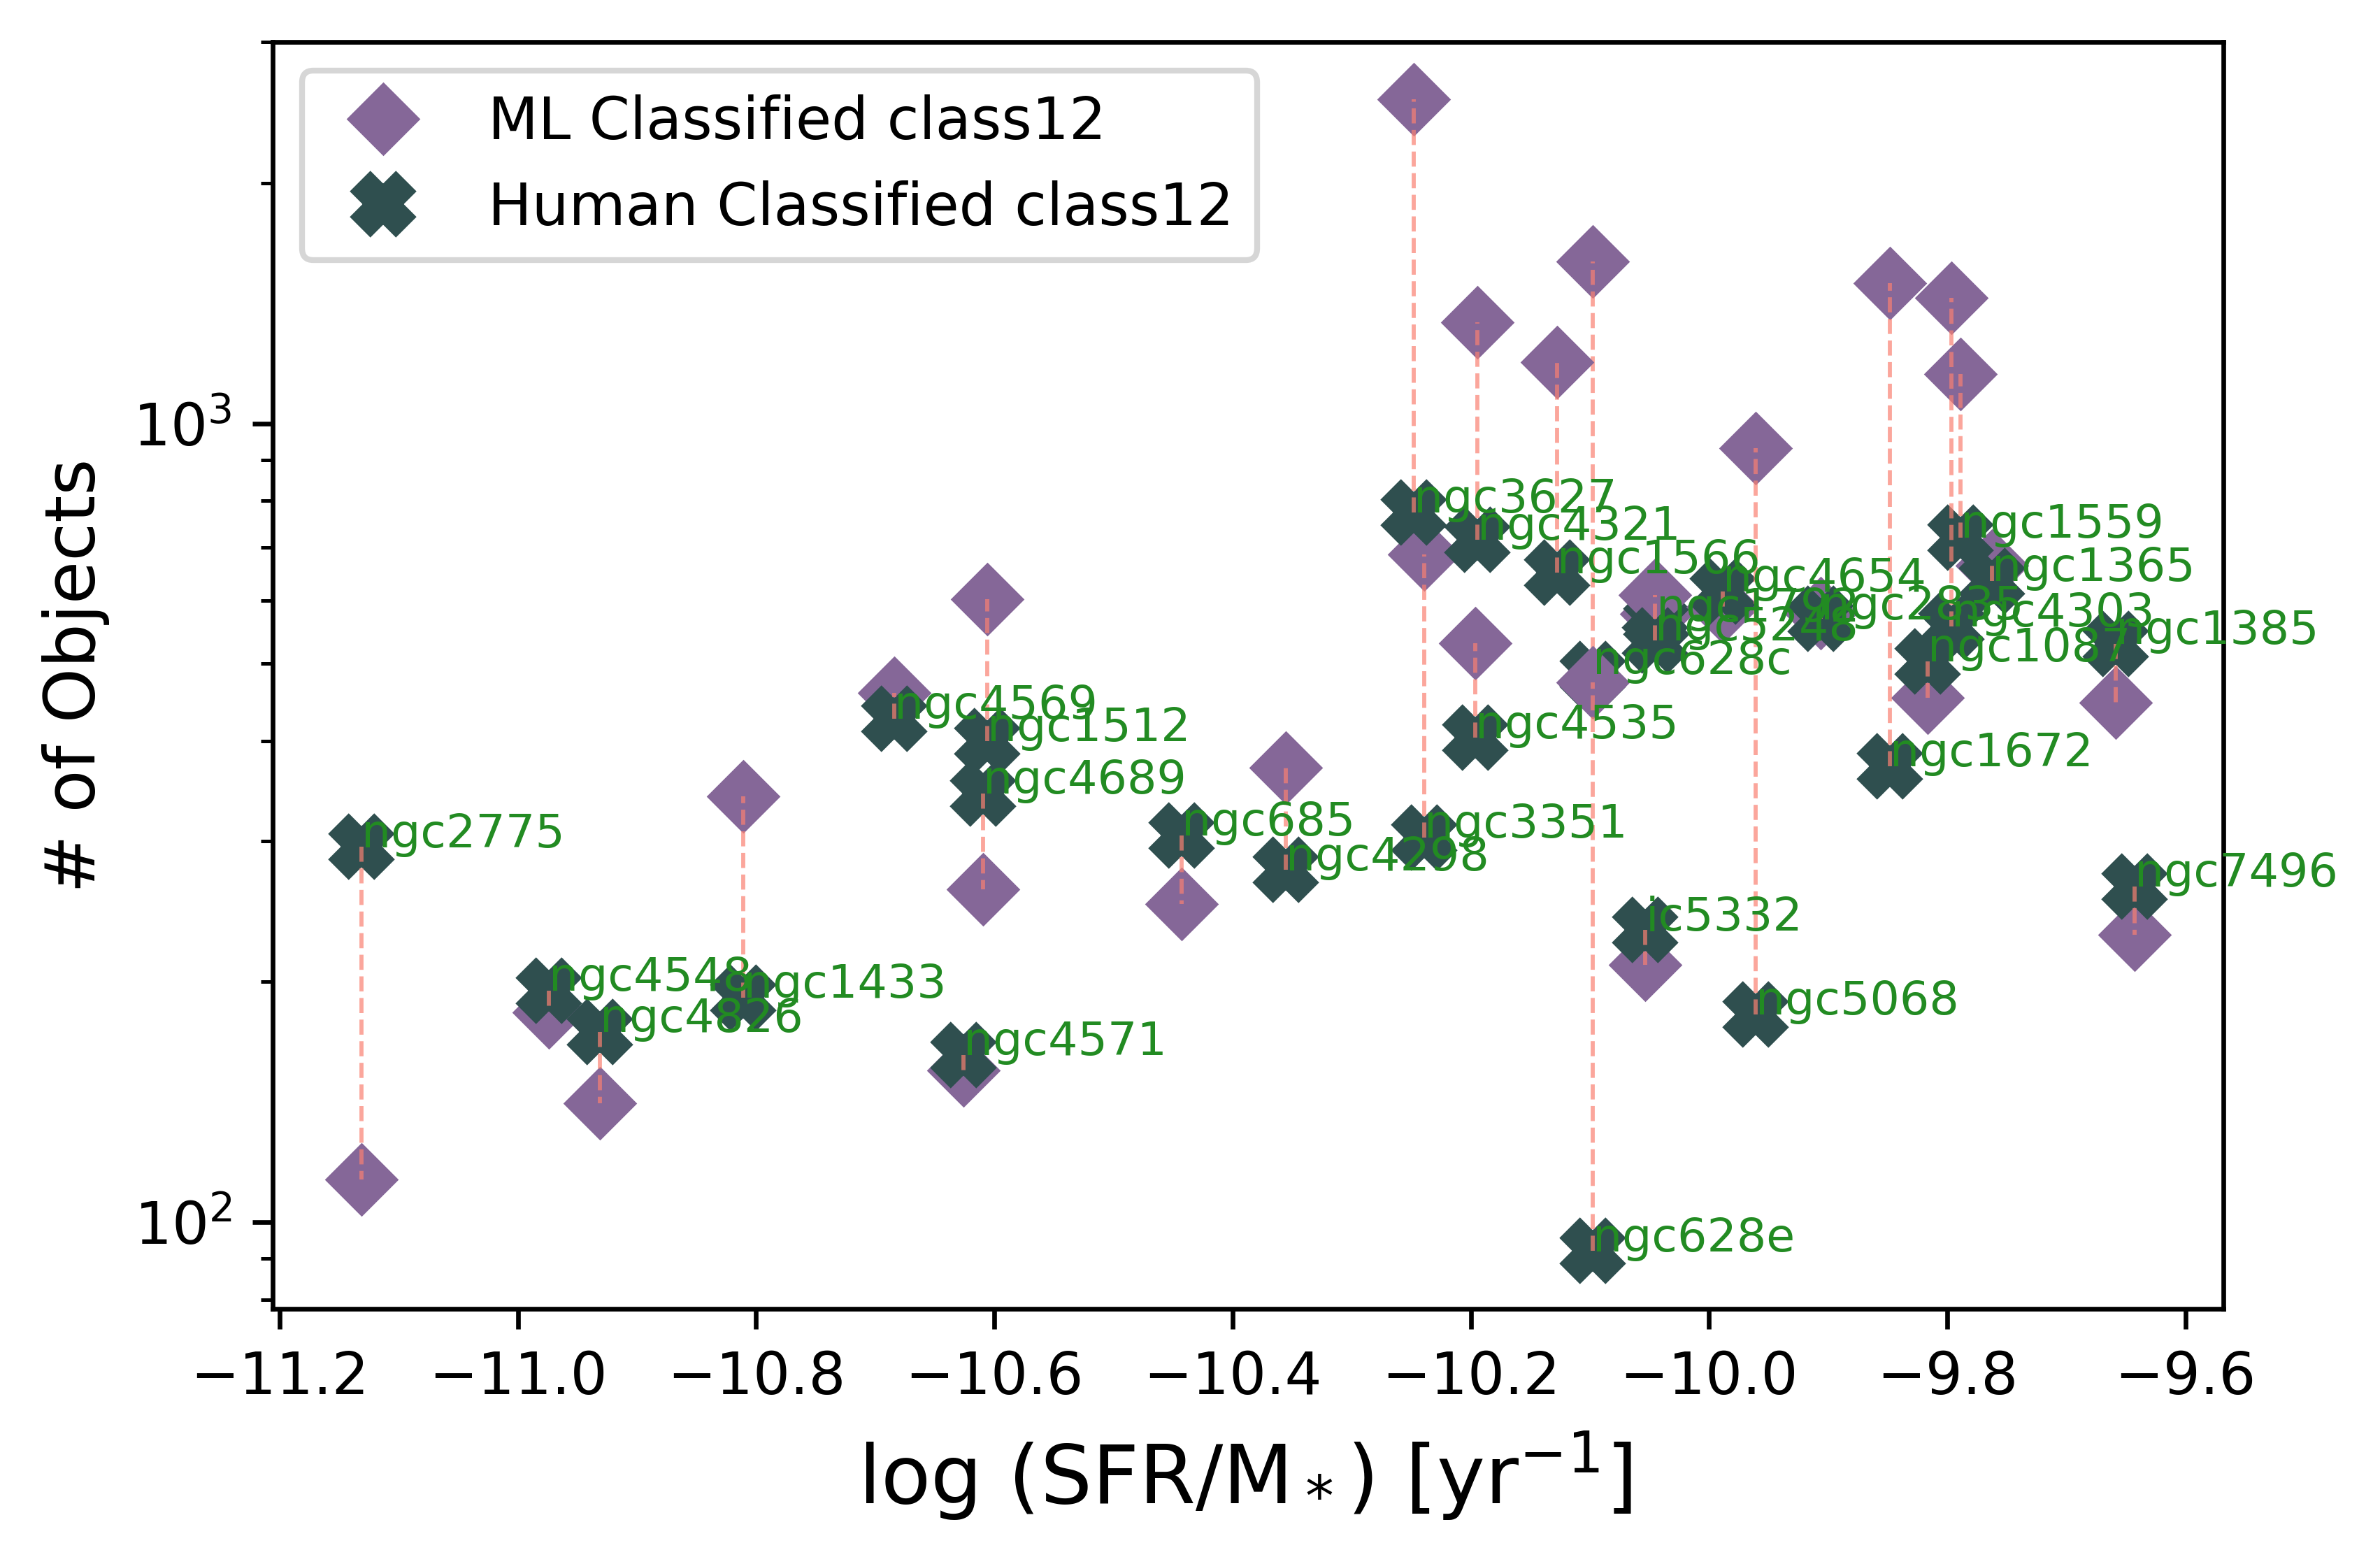

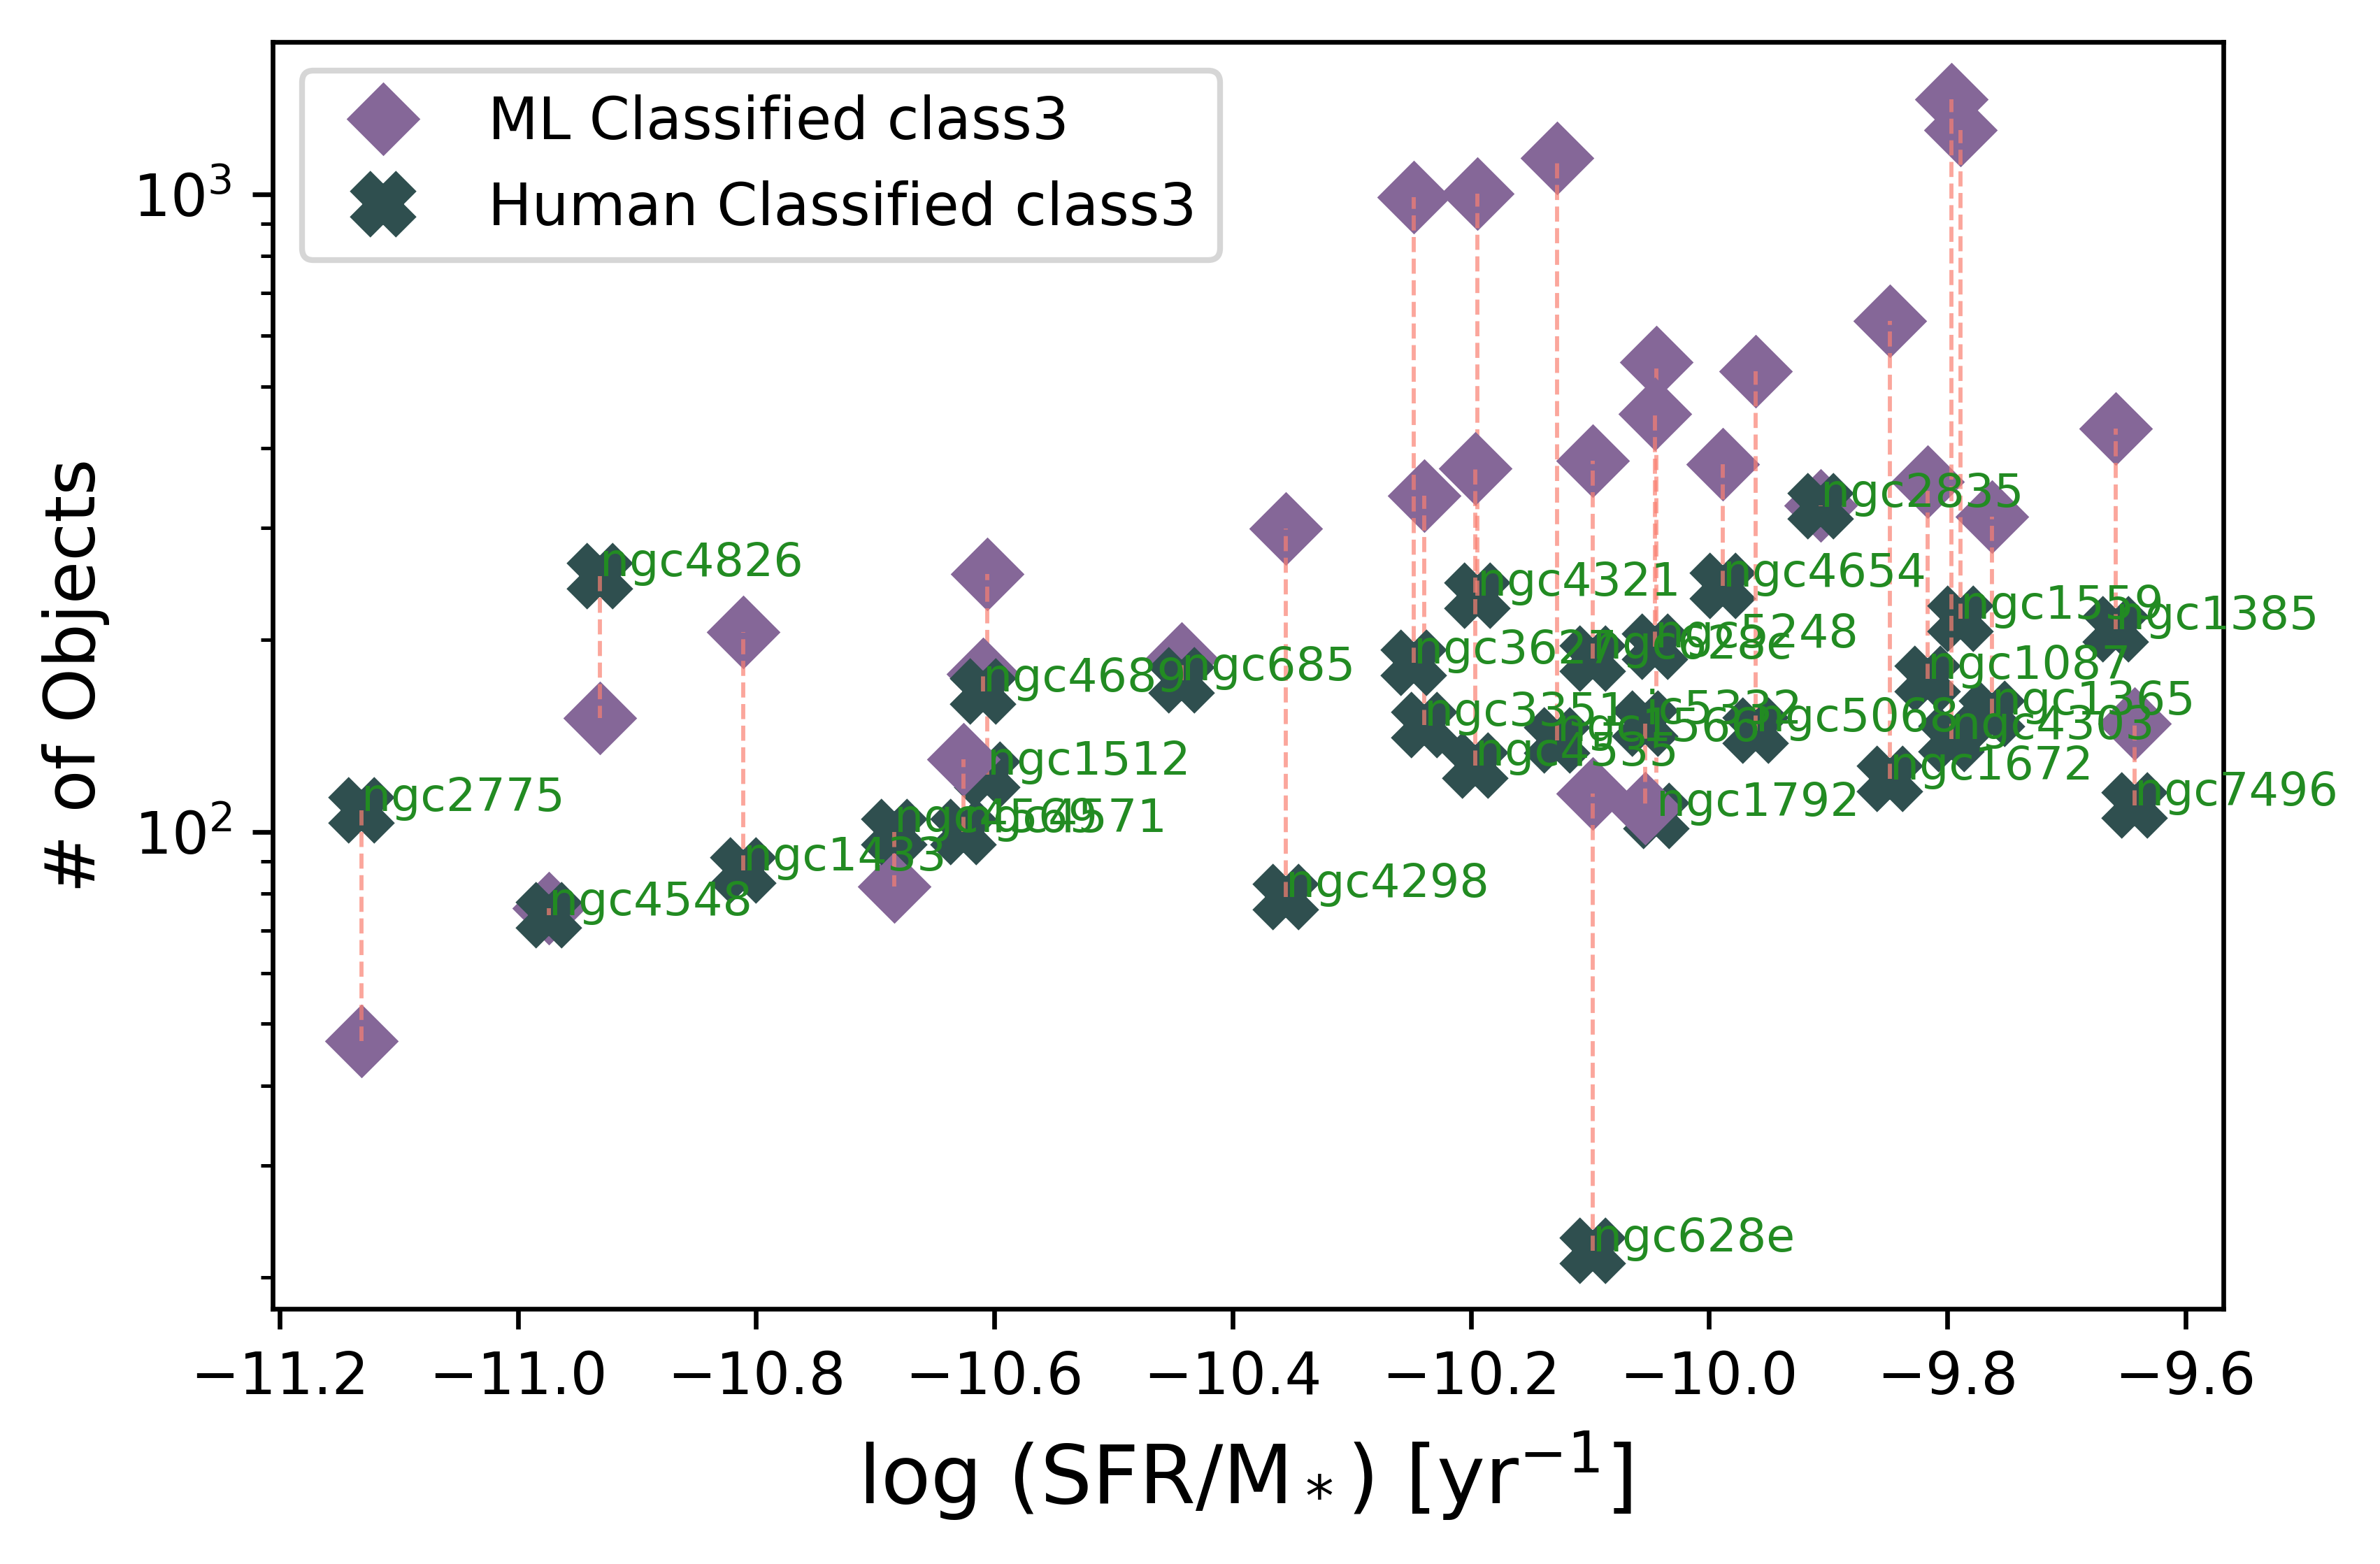

In [11]:
for class_ind_, class_str_ in enumerate(class_label_list):
    for galaxy_ind_, galaxy_ in enumerate(analyze_list):
        """Read the human classified catalog"""
        hc_table = Table.read(cwd+'/compact_clusters_and_associations/'
                              +ir_label+'_'+galaxy_+'_phangs-hst_v1p1_human_'+class_str_+'.fits')
        hc_df = hc_table.to_pandas()
        """Read the machine classified catalog"""
        ml_table = Table.read(cwd+'/compact_clusters_and_associations/'
                              +ir_label+'_'+galaxy_+'_phangs-hst_v1p1_ml_'+class_str_+'.fits')
        ml_df = ml_table.to_pandas()
        """
        Next, we plot the total number of objects in the classification scheme the catalogs uses as its basis per galaxy 
        versus the logarithm of the specific star formation rate.
        """
        if galaxy_ == 'ngc685':
            galaxy_log_ssfr = np.log10(phangs_props_df.loc[phangs_props_df['name'] == 'ngc0685']['props_sfr'].item() /
                                       phangs_props_df.loc[phangs_props_df['name'] == 'ngc0685']['props_mstar'].item())

        elif galaxy_ == 'ngc628c' or galaxy_ == 'ngc628e':  # Note that ngc628 is split into two fields for the CC catalog releases
            galaxy_log_ssfr = np.log10(phangs_props_df.loc[phangs_props_df['name'] == 'ngc0628']['props_sfr'].item() /
                                       phangs_props_df.loc[phangs_props_df['name'] == 'ngc0628']['props_mstar'].item())
        else:
            galaxy_log_ssfr = np.log10(phangs_props_df.loc[phangs_props_df['name'] == galaxy_]['props_sfr'].item() /
                                       phangs_props_df.loc[phangs_props_df['name'] == galaxy_]['props_mstar'].item())

        plt.plot(galaxy_log_ssfr, ml_df.shape[0], ms=7, marker='D',
                 c='#856798', mew=2, linestyle='', label='ML Classified '+class_str_)

        plt.plot(galaxy_log_ssfr, hc_df.shape[0], ms=8, marker='x',
                 c='darkslategray', mew=5, linestyle='', label='Human Classified '+class_str_)
        """Annotate the galaxy ID next to the human classified marker"""
        plt.annotate(galaxy_, (galaxy_log_ssfr, hc_df.shape[0]), color='forestgreen', fontsize=8)

        plt.plot([galaxy_log_ssfr, galaxy_log_ssfr],
                 [hc_df.shape[0], ml_df.shape[0]],
                 color='salmon', linestyle='dashed', label='_nolabel_', alpha=0.7, linewidth=0.7)

    plt.yscale('log')
    plt.xlabel(r'log (SFR/$\rm M_*$) [$\rm yr^{-1}$] ', fontsize=14)
    plt.ylabel('# of Objects', fontsize=12)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()
    plt.close()


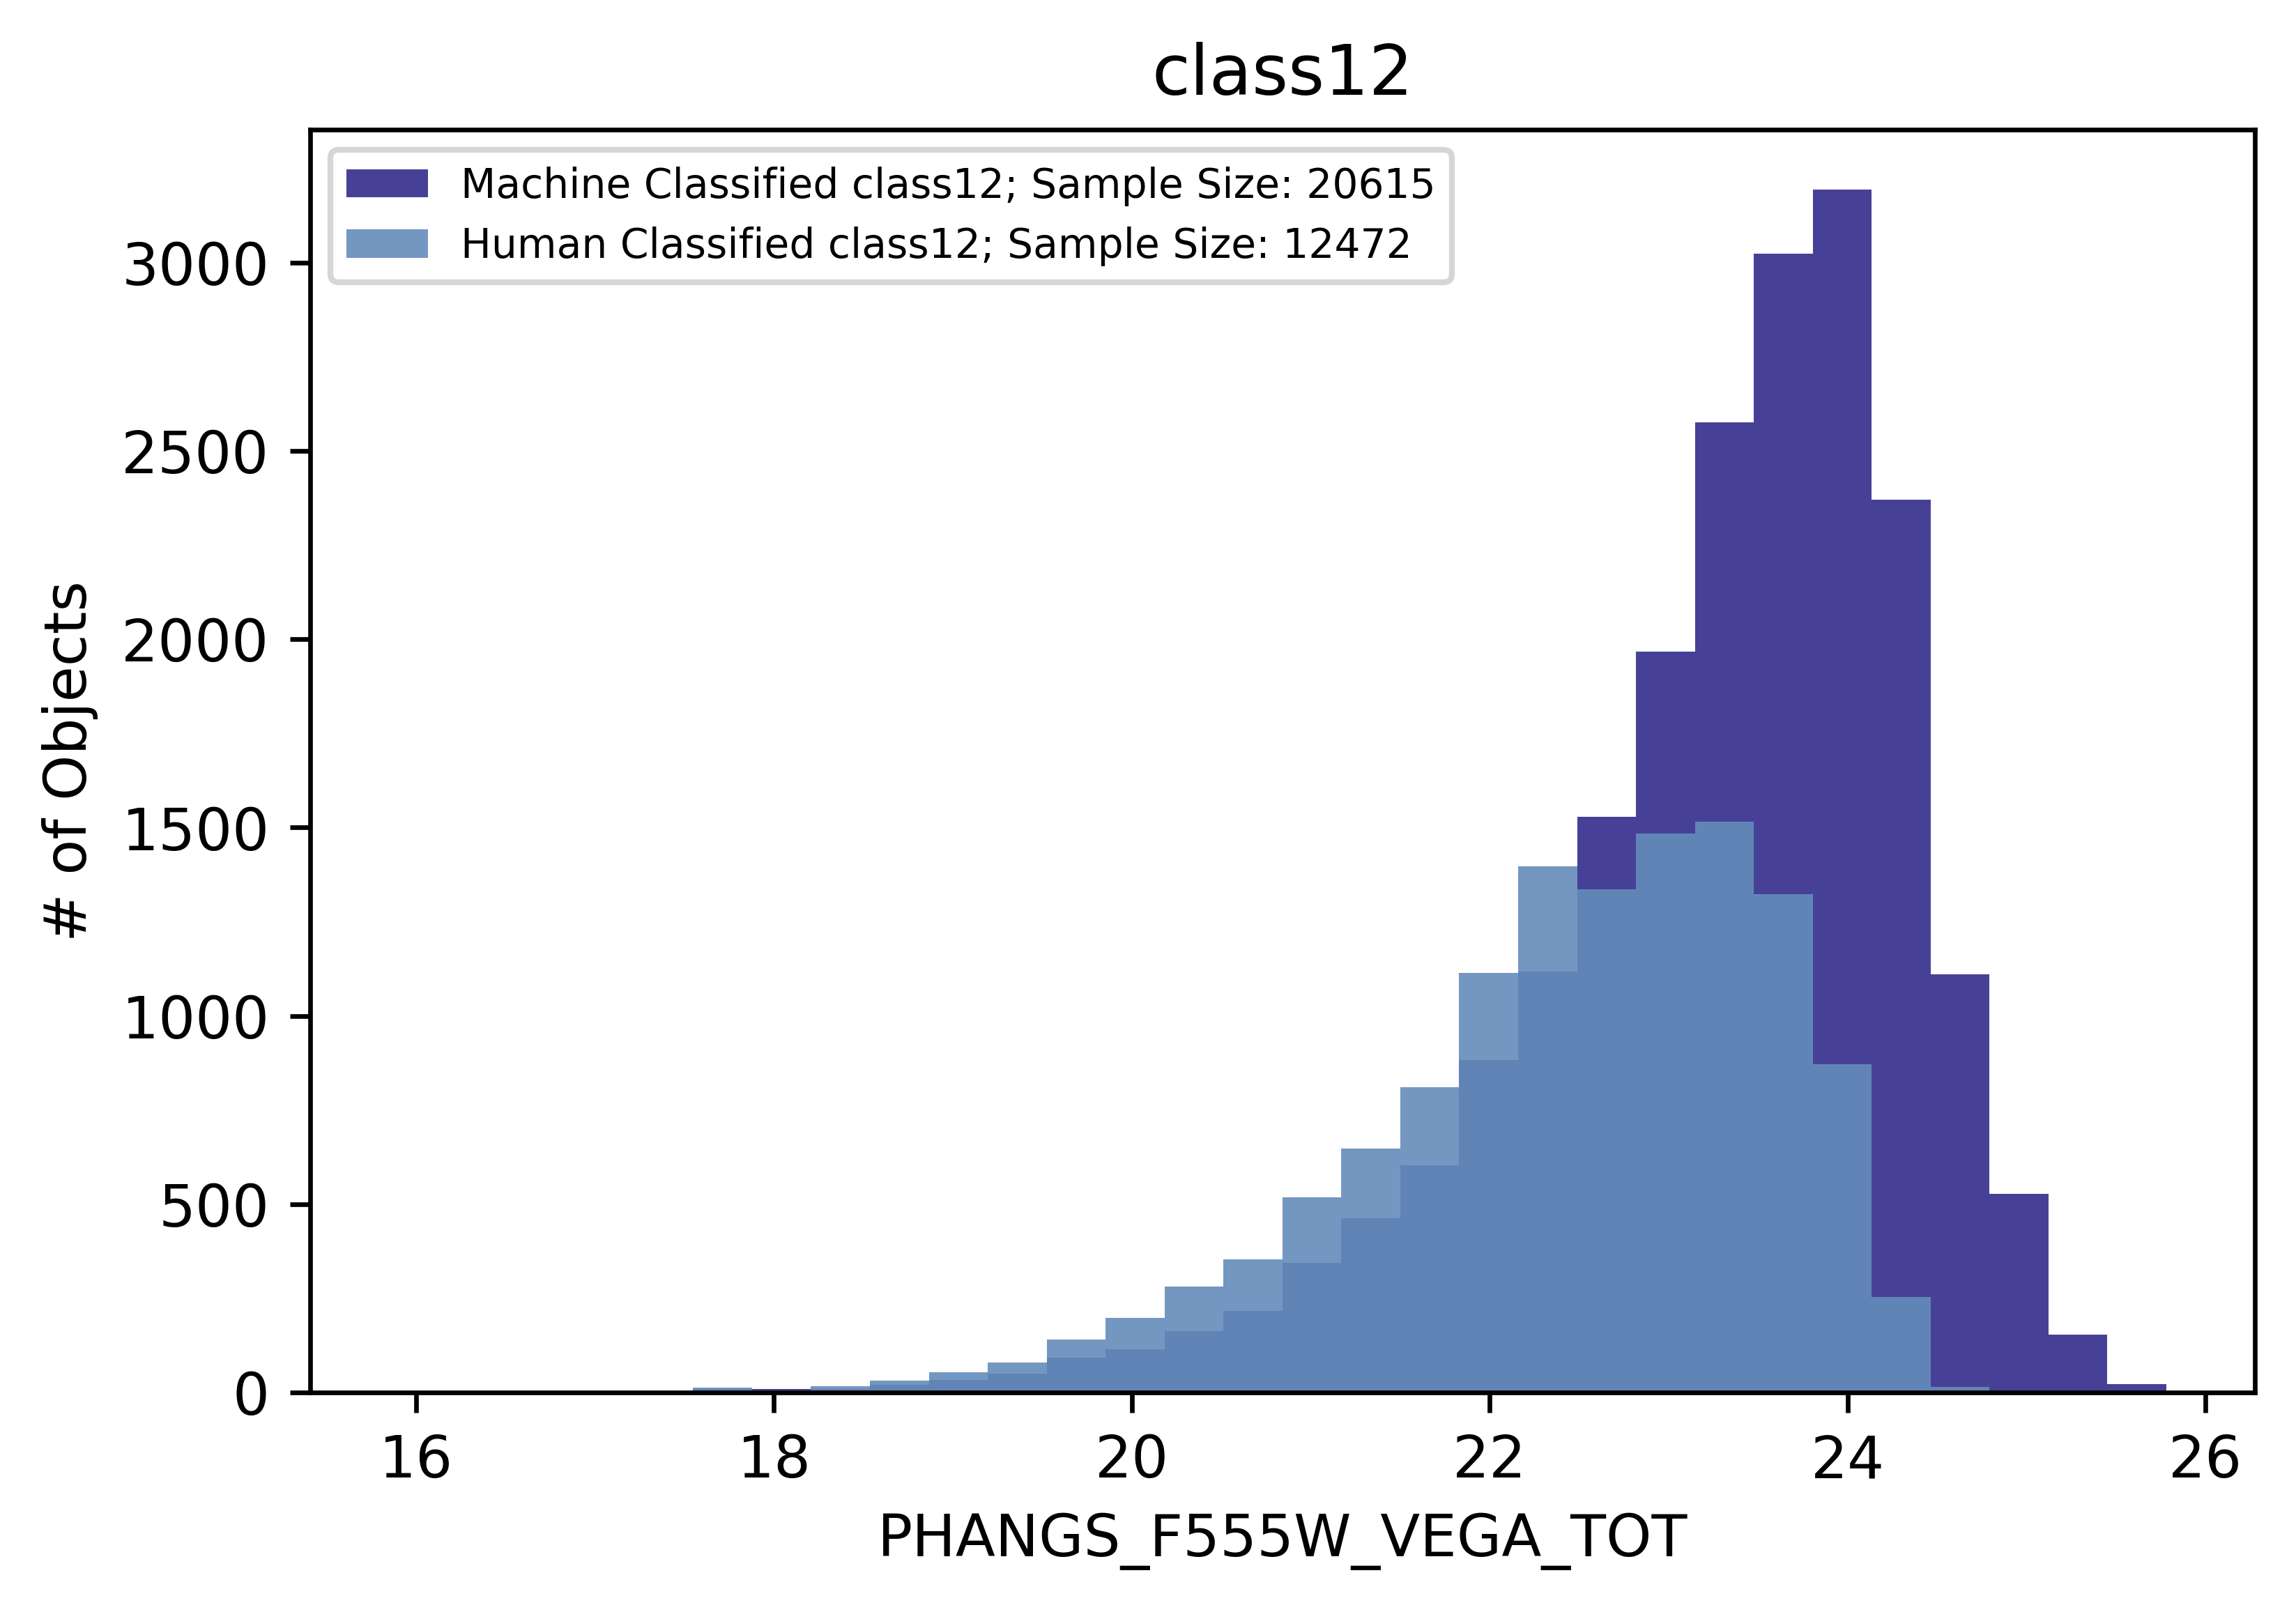

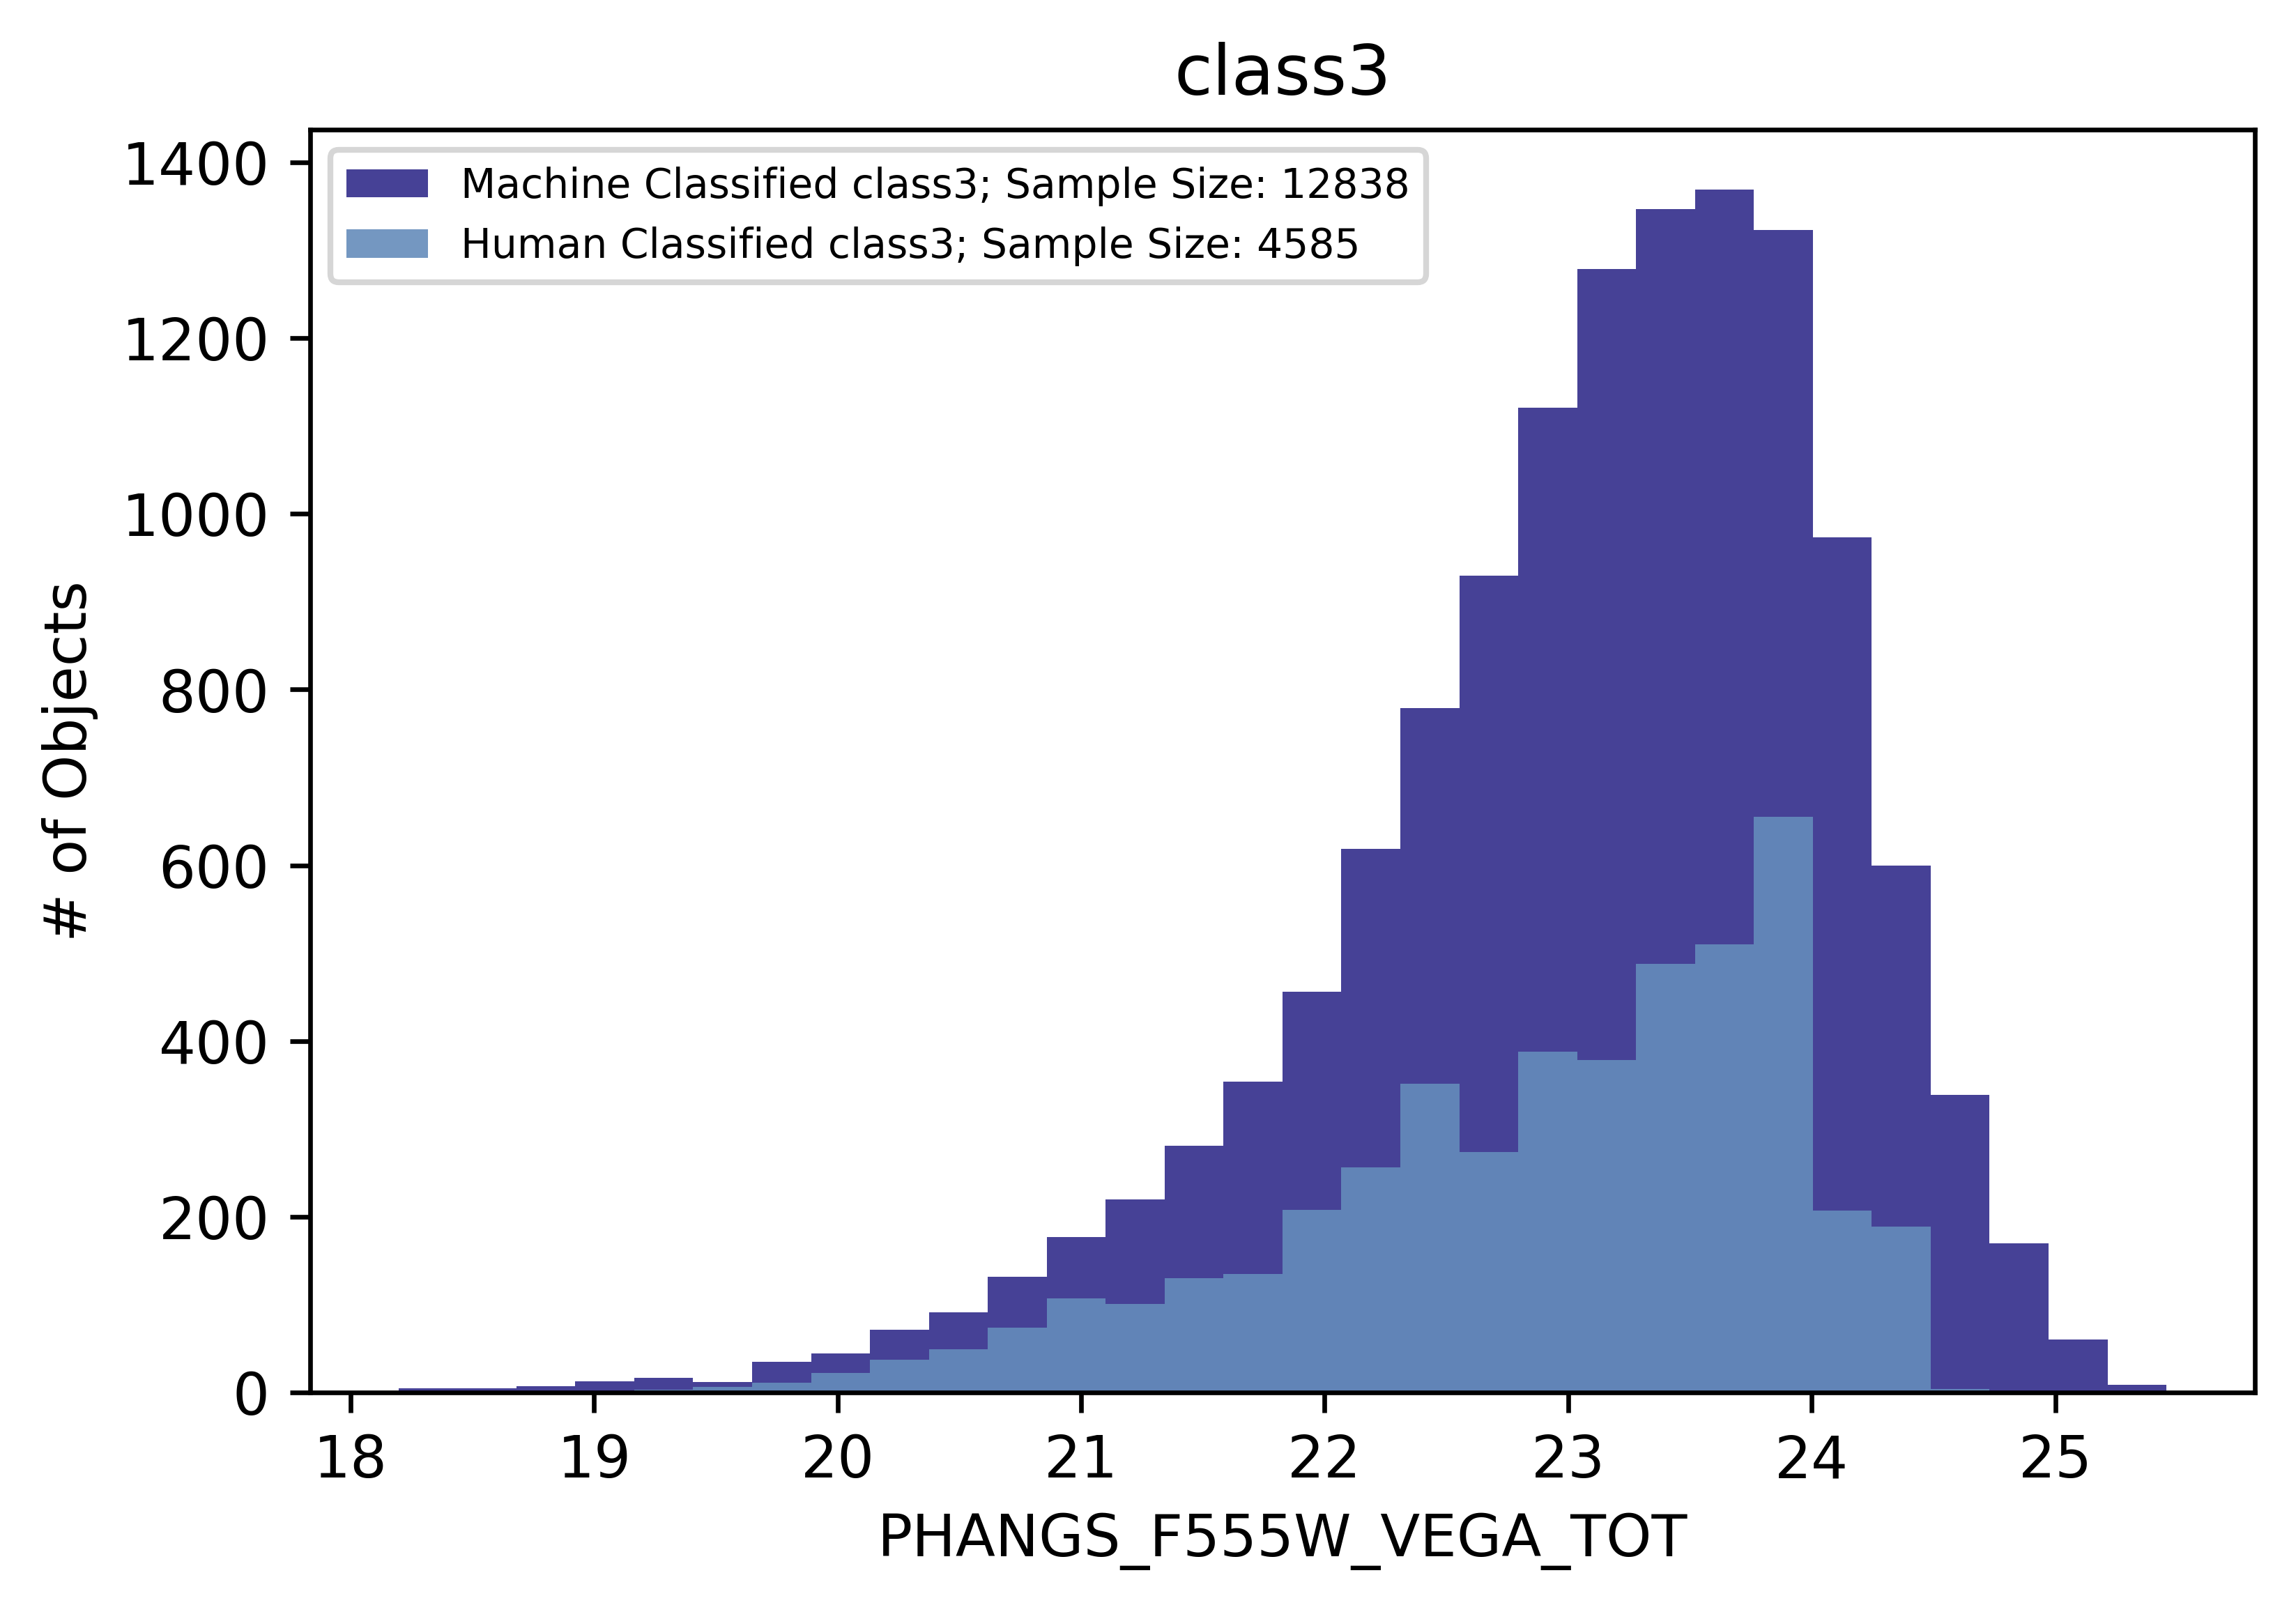

In [16]:
"""Next, we can make a simple histogram demonstrating the total (aperture and foreground extinction corrected)
V-band magnitude distributions of individual catalogs"""
v_dist_dict = {'hc_v_dist_class12': [], 'ml_v_dist_class12': [],
               'hc_v_dist_class3': [], 'ml_v_dist_class3': []}

for class_ind_, class_str_ in enumerate(class_label_list):
    for galaxy_ind_, galaxy_ in enumerate(analyze_list):
        """Read the human classified catalog"""
        hc_table = Table.read(cwd+'/compact_clusters_and_associations/'
                              +ir_label+'_'+galaxy_+'_phangs-hst_v1p1_human_'+class_str_+'.fits')
        hc_df = hc_table.to_pandas()
        """Read the machine classified catalog"""
        ml_table = Table.read(cwd+'/compact_clusters_and_associations/'
                              +ir_label+'_'+galaxy_+'_phangs-hst_v1p1_ml_'+class_str_+'.fits')
        ml_df = ml_table.to_pandas()
        
        """We append the V-band magnitudes per galaxy to the dictionary we defined above"""
        v_dist_dict['hc_v_dist_'+class_str_].extend(hc_df['PHANGS_F555W_VEGA_TOT'].tolist())
        v_dist_dict['ml_v_dist_'+class_str_].extend(ml_df['PHANGS_F555W_VEGA_TOT'].tolist())

    bins_ = np.histogram(np.hstack((v_dist_dict['hc_v_dist_'+class_str_], v_dist_dict['ml_v_dist_'+class_str_])), bins=30)[1]
    plt.hist(v_dist_dict['ml_v_dist_'+class_str_], color='#464196', bins=bins_,
             label='Machine Classified '+class_str_+'; Sample Size: '+
             str(np.shape(v_dist_dict['ml_v_dist_'+class_str_])[0]))
    plt.hist(v_dist_dict['hc_v_dist_'+class_str_],
             color='#658cbb', bins=bins_,
             label='Human Classified '+class_str_+'; Sample Size: '+
             str(np.shape(v_dist_dict['hc_v_dist_'+class_str_])[0]), alpha=0.9)

    plt.title(class_str_)
    plt.xlabel('PHANGS_F555W_VEGA_TOT')
    plt.ylabel('# of Objects')
    plt.legend(loc='upper left', prop={'size':7})
    plt.show()
    plt.close()